# Logistic Regression using Multiclass Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits #using sklearn dataset of handwritten digits

In [2]:
digits = load_digits()

In [3]:
dir(digits) #it has data and images separtely

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
digits.data[0] # it shows the first element of data which is a 2D array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

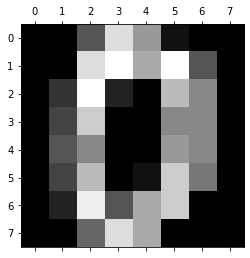

In [6]:
plt.gray()
plt.matshow(digits.images[0]) #this show the first element of images

<Figure size 432x288 with 0 Axes>

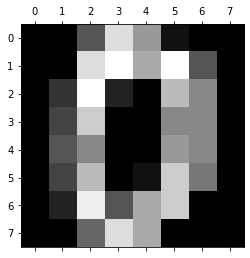

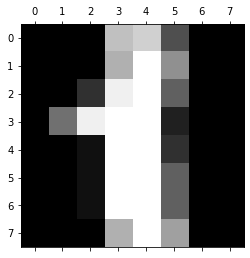

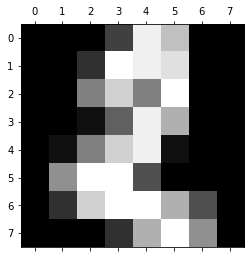

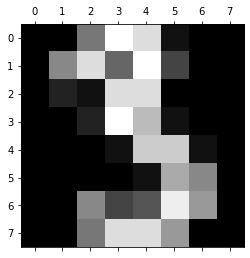

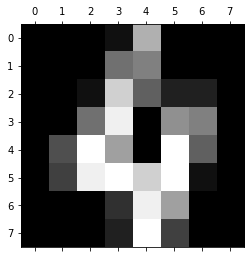

In [8]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [9]:
digits.target[0:5] #first 5 elements of target

array([0, 1, 2, 3, 4])

In [12]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [18]:
len(X_train)

1437

In [19]:
len(X_test)

360

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

C:\Users\xavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.score(X_test,y_test)

0.9555555555555556

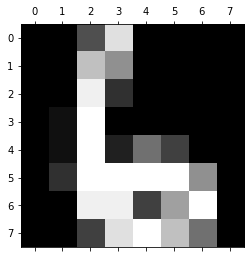

In [23]:
plt.matshow(digits.images[67]) # random pick an image

In [24]:
digits.target[67] # check what digit it is

6

In [25]:
model.predict([digits.data[67]]) #predict using the model

array([6])

In [26]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## Confusion Matrix to check the where the model is failing

In [27]:
y_predicted = model.predict(X_test) #save all the predicted values of X_test in y_predicted
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  3,  0,  1,  2,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 37,  0,  1],
       [ 0,  3,  0,  0,  1,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

### Visualization of Confusion Matrix using SEABORN for better understanding

Text(69.0, 0.5, 'Truth')

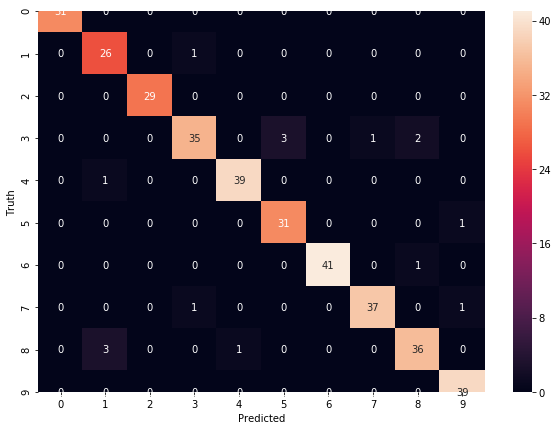

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')